# High Diastolic blood pressure model

In [1]:

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import warnings
import sklearn

from scipy.stats import uniform, loguniform

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import BernoulliNB

from IPython.display import display
from IPython.display import HTML
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute._base import SimpleImputer as Imputer 
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
   
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

### We maximize the average precision metric

In [2]:
score_obj = 'average_precision'

#### Split training and validation set

In [3]:
import pickle5 as pickle
with open("HT_train.pkl","rb") as fh:
    df_train = pickle.load(fh)

#df_train = pd.read_pickle("HT_train.pkl")  

df_train, df_valid = train_test_split( df_train,  
                                          train_size = .9, 
                                          test_size = .1)

#### Balancing the training set by downsampling

In [4]:
from sklearn.utils import resample

df_train_p = df_train[(df_train.HyperDiastolic == 1)]
df_train_n = df_train[(df_train.HyperDiastolic == 0)] 

samples = min(df_train_p.shape[0],df_train_n.shape[0])

df_train_p_dnsampled = resample(df_train_p, replace=False, n_samples=samples)
df_train_n_dnsampled = resample(df_train_n, replace=False, n_samples=samples) 

df_train = pd.concat([df_train_n_dnsampled,df_train_p_dnsampled])

#### Create training and validation sets

The training set is balanced by downsampling, the valid_bal set is balanced, the second valid set has the original (imbalanced) distribution.

In [5]:
df_train, df_valid_bal = train_test_split(df_train, 
                                          train_size = .9, 
                                          test_size = .1)


Z_train = df_train.drop(['HyperSystolic','HyperDiastolic','Hypertensive'], axis = 1)
w_train = df_train['HyperDiastolic']
 
Z_valid_bal = df_valid_bal.drop(['HyperSystolic','HyperDiastolic','Hypertensive'], axis = 1)
w_valid_bal = df_valid_bal['Hypertensive']

Z_valid = df_valid.drop(['HyperSystolic','HyperDiastolic','Hypertensive'], axis = 1)
w_valid = df_valid['HyperDiastolic']


### Features for the model:

In [6]:

print('The features for our hypertension model are as follows:\n')
print(', '.join(Z_train.columns))
print('\nThe dimensions of the hypertension training set are ', Z_train.shape)
print('\nThe dimensions of the hypertension validation set are ', Z_valid.shape)

The features for our hypertension model are as follows:

Age, Education, Gender, HHIncome, Alcohol, HyperHist, CholHist, ChestPain, Shortness, DiabHist, Frozen, FastFood, ReadytoEat, MealsOut, Milk, KidneyStones, WeakKidneys, UrineLeak, FeltBad, HoursWorked, Dental, Pesticides, ModRec, WalkBike, VigRec, ModWork, VigWork, PregnantEver, PregnantNow, HoursSlept, Smoke100, SmokeNow, Pulse, Weight, ArmCirc, BMI, LegLen, ArmLen, Waist, FoodFastHours, SessionTime, MaxWeightRatio, DiabAgeYoung, DiabAgeOld, MexAm, Hisp, White, Black

The dimensions of the hypertension training set are  (9442, 48)

The dimensions of the hypertension validation set are  (2742, 48)


### Parameter search for several models



Decision Tree Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.62      0.72      0.67      4716
         1.0       0.67      0.57      0.62      4726

    accuracy                           0.64      9442
   macro avg       0.65      0.64      0.64      9442
weighted avg       0.65      0.64      0.64      9442

Decision Tree Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.46      0.69      0.55       401
         1.0       0.72      0.51      0.60       649

    accuracy                           0.58      1050
   macro avg       0.59      0.60      0.57      1050
weighted avg       0.62      0.58      0.58      1050

Decision Tree Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.85      0.71      0.77      2165
         1.0       0.33      0.55      0.42       577

    accuracy                       

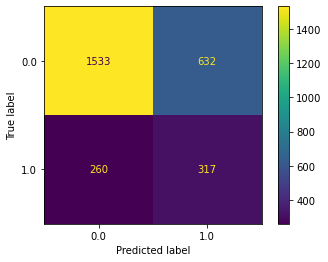

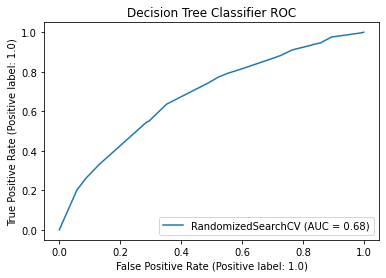

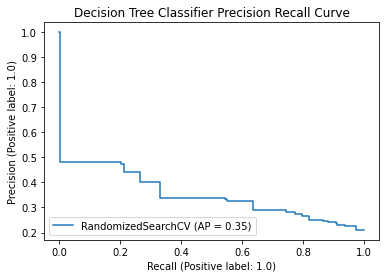

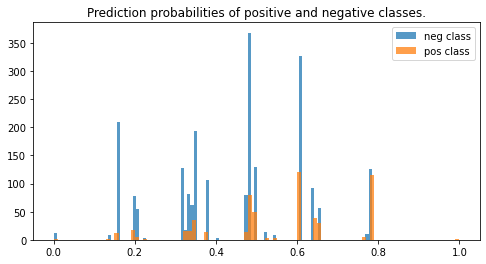







Random Forest Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75      4716
         1.0       0.74      0.78      0.76      4726

    accuracy                           0.75      9442
   macro avg       0.75      0.75      0.75      9442
weighted avg       0.75      0.75      0.75      9442

Random Forest Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.53      0.64      0.58       401
         1.0       0.74      0.64      0.69       649

    accuracy                           0.64      1050
   macro avg       0.63      0.64      0.63      1050
weighted avg       0.66      0.64      0.65      1050

Random Forest Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.88      0.62      0.73      2165
         1.0       0.32      0.67      0.43       577

    accuracy                   

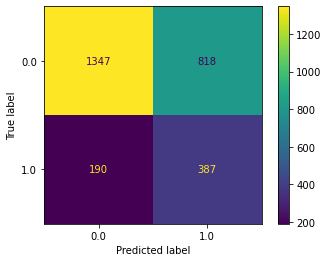

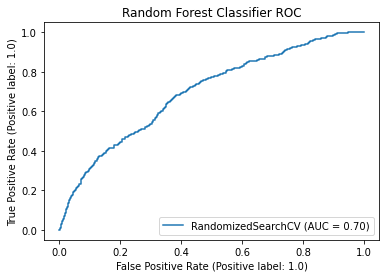

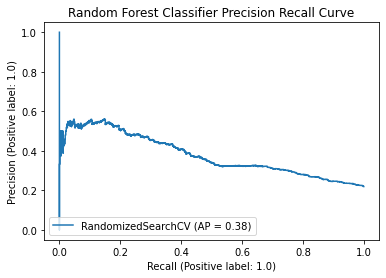

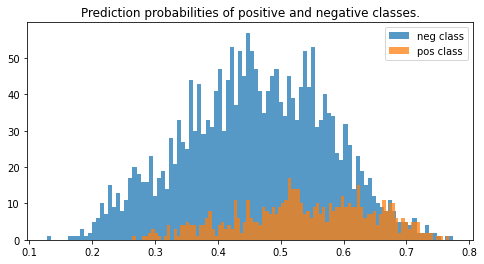







Gradient Boosting Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.67      0.64      0.66      4716
         1.0       0.66      0.69      0.67      4726

    accuracy                           0.66      9442
   macro avg       0.66      0.66      0.66      9442
weighted avg       0.66      0.66      0.66      9442

Gradient Boosting Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.50      0.63      0.56       401
         1.0       0.73      0.61      0.67       649

    accuracy                           0.62      1050
   macro avg       0.62      0.62      0.61      1050
weighted avg       0.64      0.62      0.63      1050

Gradient Boosting Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.88      0.63      0.74      2165
         1.0       0.33      0.67      0.44       577

    accuracy       

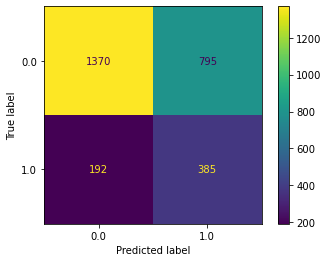

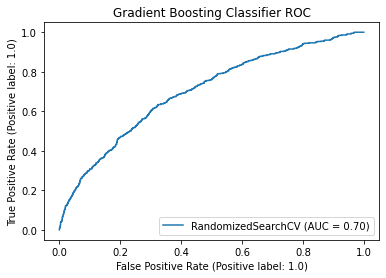

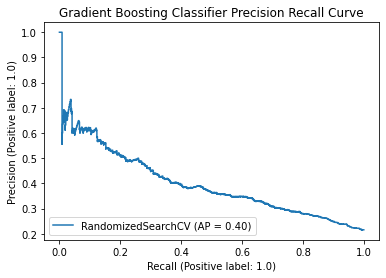

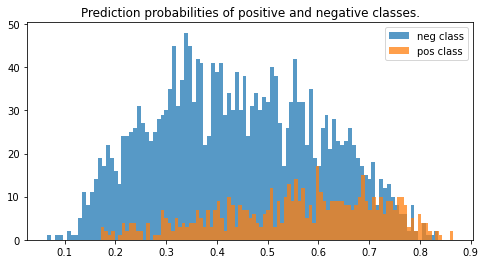







Logistic Regression Train Set Report
              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61      4716
         1.0       0.61      0.60      0.61      4726

    accuracy                           0.61      9442
   macro avg       0.61      0.61      0.61      9442
weighted avg       0.61      0.61      0.61      9442

Logistic Regression Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.50      0.65      0.56       401
         1.0       0.73      0.60      0.66       649

    accuracy                           0.62      1050
   macro avg       0.62      0.62      0.61      1050
weighted avg       0.64      0.62      0.62      1050

Logistic Regression Validation Set Report
              precision    recall  f1-score   support

         0.0       0.85      0.61      0.71      2165
         1.0       0.29      0.59      0.39       577

    accuracy                           0.61   

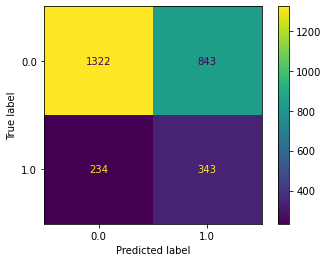

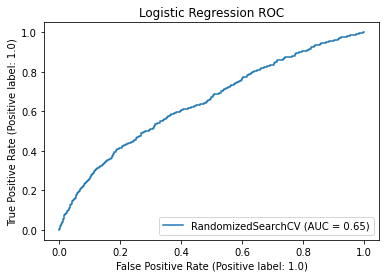

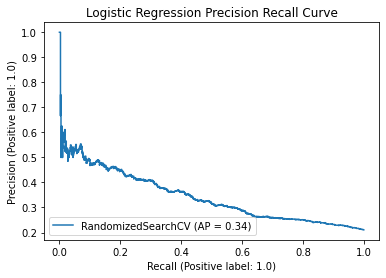

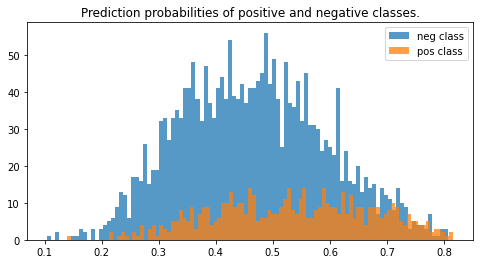







Support Vector (rbf kernel) Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.64      0.65      0.65      4716
         1.0       0.65      0.63      0.64      4726

    accuracy                           0.64      9442
   macro avg       0.64      0.64      0.64      9442
weighted avg       0.64      0.64      0.64      9442

Support Vector (rbf kernel) Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.52      0.69      0.59       401
         1.0       0.76      0.60      0.67       649

    accuracy                           0.64      1050
   macro avg       0.64      0.65      0.63      1050
weighted avg       0.67      0.64      0.64      1050

Support Vector (rbf kernel) Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.85      0.64      0.73      2165
         1.0       0.30      0.58      0.40 

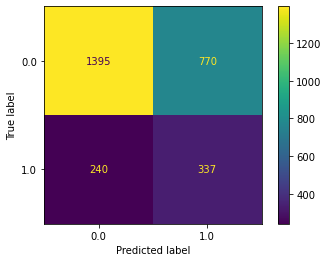

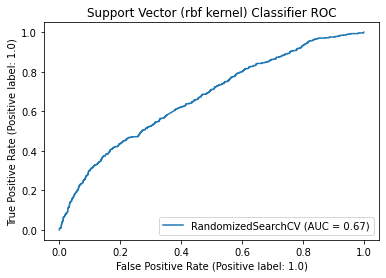

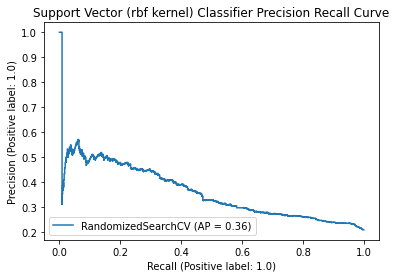

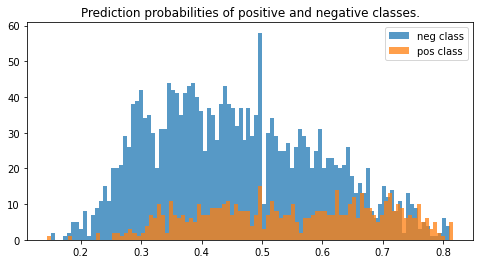







XGB Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.67      0.64      0.66      4716
         1.0       0.66      0.69      0.67      4726

    accuracy                           0.67      9442
   macro avg       0.67      0.67      0.66      9442
weighted avg       0.67      0.67      0.66      9442

XGB Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.51      0.64      0.57       401
         1.0       0.74      0.63      0.68       649

    accuracy                           0.63      1050
   macro avg       0.62      0.63      0.62      1050
weighted avg       0.65      0.63      0.64      1050

XGB Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.88      0.63      0.73      2165
         1.0       0.33      0.67      0.44       577

    accuracy                           0.64      2742
   macr

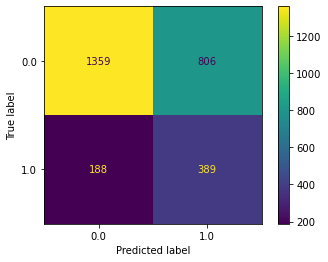

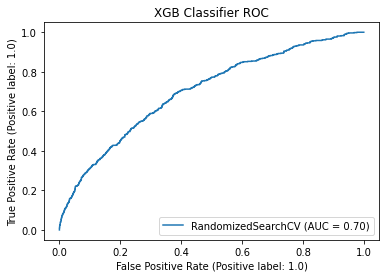

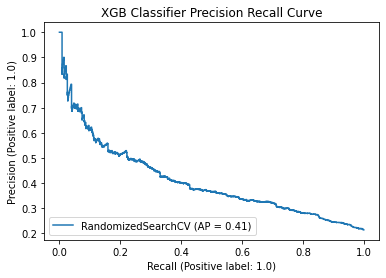

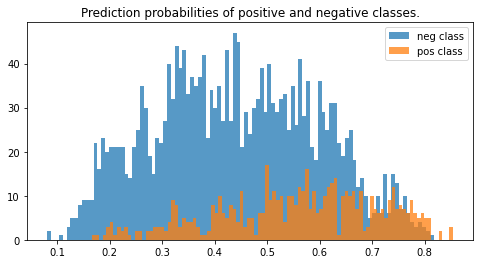

In [7]:

models = {
    'Decision Tree Classifier':{
        'algo': DecisionTreeClassifier(), 
        'n_search':20,
        'grid': {'decisiontreeclassifier__max_depth':list(range(1,30))}
    },
    'Random Forest Classifier':{
        'algo': RandomForestClassifier(), 
        'n_search':20,
        'grid': {'randomforestclassifier__max_depth':list(range(1,20)),
               'randomforestclassifier__n_estimators':list(range(50,250,25)),
                'randomforestclassifier__criterion':['gini','entropy']}
    },
    'Gradient Boosting Classifier':{
        'algo': GradientBoostingClassifier(),  
        'n_search':20,
        'grid':  {'gradientboostingclassifier__max_depth': list(range(1,20)), 
               'gradientboostingclassifier__n_estimators': list(range(50,250,25)),
               'gradientboostingclassifier__loss': ['deviance','exponential']}
    },
    'Logistic Regression':{
        'algo': LogisticRegression(), 
        'n_search':20,
        'grid':{'logisticregression__C': loguniform(1e-2 , 1e2) }
    },
    'Support Vector (rbf kernel) Classifier':{
        'algo': SVC(kernel = 'rbf',probability=True), 
        'n_search':20,
        'grid': { 'svc__gamma': loguniform(1e-4, 1e0),
               'svc__C': loguniform(1, 1e3)} 
    },
    'XGB Classifier':{
        'algo': XGBClassifier(use_label_encoder=False,eval_metric = 'logloss'),  
        'n_search': 40,
        'grid': {'xgbclassifier__eta': loguniform(1e-2, 1e0), 
              'xgbclassifier__gamma': loguniform(1e-8 , 1e-2),
              'xgbclassifier__lambda': loguniform(1e-2 , 1e1),
              'xgbclassifier__alpha': loguniform(1e-8 , 1e-4),
              'xgbclassifier__max_depth': [3,4,5,6,7,8]} 
    }
}

for name, model in models.items():
    
    algorithm = model['algo']
    n_search = model['n_search']
    grid_params = model['grid'] 
       
    pipeline = make_pipeline( MinMaxScaler(),algorithm )
    
    model_grid = RandomizedSearchCV(pipeline,grid_params, 
                                    cv = 5, n_jobs = 1, 
                                    scoring = score_obj, n_iter=n_search)
    
    model_grid.fit(Z_train, w_train)
    model['trained'] = model_grid
    
    print('\n')
    
    HTML('<font size = 7>'+name+'</font>')
    
    w_train_pred = model_grid.predict(Z_train)
    print(name, 'Train Set Report')
    print(classification_report(w_train, w_train_pred))
    
    w_valid_bal_pred = model_grid.predict(Z_valid_bal)
    print(name, 'Balanced Validation Set Report')
    print(classification_report(w_valid_bal, w_valid_bal_pred))
    
    w_valid_pred = model_grid.predict(Z_valid)
    print(name, 'Validation Set Report')
    print(classification_report(w_valid, w_valid_pred))
  

    
    plot_confusion_matrix(model_grid, Z_valid, w_valid)
    plt.show()
    
    metrics.plot_roc_curve(model_grid,Z_valid,w_valid)
    title = name + ' ROC'
    plt.title(title)
    plt.show()
    
    metrics.plot_precision_recall_curve(model_grid,Z_valid,w_valid)
    title = name + ' Precision Recall Curve'
    plt.title(title)
    plt.show()
    
    try: 
        w_valid_prob_pred = model_grid.predict_proba(Z_valid)[:, 1]
        plt.figure(figsize=(8,4))
        plt.hist(w_valid_prob_pred[np.where(w_valid == 0)], bins=100, alpha=0.75, label='neg class')
        plt.hist(w_valid_prob_pred[np.where(w_valid == 1)], bins=100, alpha=0.75, label='pos class')
        plt.legend()
        plt.title('Prediction probabilities of positive and negative classes.')
        plt.show()
    except:
        pass
         
    model['AP_score'] = metrics.average_precision_score(w_valid,w_valid_prob_pred)
    model['Best Parameters'] = model_grid.best_params_
    
    
    print('\n'*3)
    
    

### Top models

In [8]:
f1_dict = {name:models[name]['AP_score'] for name in models}
from collections import Counter
best_models = [x[0] for x in Counter(f1_dict).most_common(3)]
best_models = {x: models[x] for x in best_models }
 
for name, model in best_models.items():
    print(f'Model: {name}')
    print(f"Average Precision score: {model['AP_score']}")
    print('Parameters:')
    for parameter, value in model['Best Parameters'].items():
        print(f"{parameter.split('__')[1]}: {value}")
    print('\n'*2)

Model: XGB Classifier
Average Precision score: 0.4078923042627599
Parameters:
alpha: 1.739921083309157e-05
eta: 0.05729672970042378
gamma: 1.7044673961049646e-05
lambda: 1.0068007245353514
max_depth: 3



Model: Gradient Boosting Classifier
Average Precision score: 0.39983137130656543
Parameters:
n_estimators: 125
max_depth: 2
loss: deviance



Model: Random Forest Classifier
Average Precision score: 0.3793102690066825
Parameters:
n_estimators: 175
max_depth: 9
criterion: entropy





### Stacking classifier

Stacking Classifier Train Report
              precision    recall  f1-score   support

         0.0       0.68      0.65      0.67      4716
         1.0       0.67      0.70      0.68      4726

    accuracy                           0.68      9442
   macro avg       0.68      0.68      0.68      9442
weighted avg       0.68      0.68      0.68      9442

Stacking Classifier Validation Report
              precision    recall  f1-score   support

         0.0       0.88      0.63      0.73      2165
         1.0       0.32      0.66      0.44       577

    accuracy                           0.64      2742
   macro avg       0.60      0.65      0.59      2742
weighted avg       0.76      0.64      0.67      2742



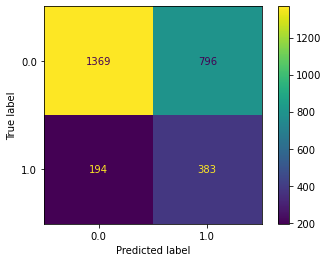

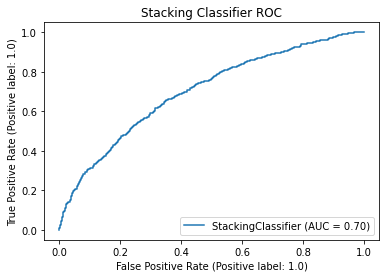

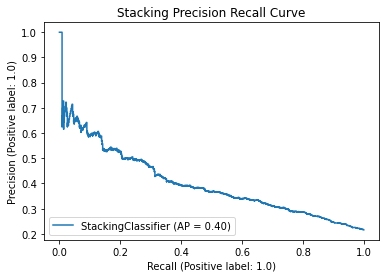

Stacking classifier average precision score: 0.4021.


In [9]:
estimators = [
    ('XGB', XGBClassifier(use_label_encoder=False,eval_metric = 'logloss',
                          alpha = 1.7e-5, eta=.057, gamma=1.7e-5, reg_lambda=1, max_depth = 3)),
    ('RFC',RandomForestClassifier(n_estimators = 175, max_depth = 9, criterion = 'entropy') ),
    ('GBC',GradientBoostingClassifier(loss = 'deviance',n_estimators = 125, max_depth = 2) )
]
stack = StackingClassifier(estimators=estimators,
                          final_estimator = LogisticRegression())
stack.fit(Z_train, w_train)

w_train_pred = stack.predict(Z_train)
print('Stacking Classifier Train Report')
print(classification_report(w_train, w_train_pred))
w_valid_pred = stack.predict(Z_valid)
print('Stacking Classifier Validation Report')
print(classification_report(w_valid, w_valid_pred))
        
plot_confusion_matrix(stack, Z_valid, w_valid)
plt.show()
    
metrics.plot_roc_curve(stack,Z_valid,w_valid)
title = 'Stacking Classifier ROC'
plt.title(title)
plt.show()

metrics.plot_precision_recall_curve(stack,Z_valid,w_valid)
title = 'Stacking Precision Recall Curve'
plt.title(title)
plt.show()

w_valid_prob_pred = stack.predict_proba(Z_valid)[:, 1]
AP_score = metrics.average_precision_score(w_valid,w_valid_prob_pred)

print(f'Stacking classifier average precision score: {AP_score:.4}.')

The stacking classifier performs about as well as the XGB classifier, we will save it for further use.

In [10]:
from joblib import dump, load
clf = stack
dump(clf, 'DiastolicClf.joblib') 

['DiastolicClf.joblib']